In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sympy as sp

In [12]:
# Directory files

# Only update once

print("Actual Directory:", os.getcwd())

# Change path a main folder
os.chdir('../..')

print("New Directory:", os.getcwd())
#Directory: "\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails"

Actual Directory: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails\Codes\Past
New Directory: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails


In [49]:
def moving_filter(year,column, window_size): ## Rememeber to chabge the names of data sheet and calibreated data

  data_sheet = pd.read_parquet(f"Data\Raw_converter\{year}.parquet")
  calibrated_sheet = pd.read_parquet(f"Data\Processing_converter\{year}.parquet")
  column1 = data_sheet[column]            # We have to change the names of "data_sheet" and "Calibrated_data", thus names are for other dataframes
  column2 = calibrated_sheet[column]

  %matplotlib widget
  #moving_filter = data_sheet[f"{column} Movil_mean"] = column1.rolling(window = window_size).mean() #.rolling allow us to calculate acumulative statistics on a dynamic window

  #Plot
  x1 =  data_sheet['Seconds']
  x2 = calibrated_sheet['Seconds']

  #y axes
  #y1 = moving_filter
  y2 = column2
  y3 = column1

  plt.figure(figsize=(16, 8))
  plt.scatter(x1,y3, label = f"Raw {column}", color = "blue", s = 0.001, alpha = 1 )
  #plt.plot(x1,y1, label = f"{column} with movil mean", color = "red", linewidth = 0.8, alpha = 0.9 )
  plt.scatter(x2,y2, label = f"Calibrated {column}", color = "green", s = 0.001,alpha = 0.5)
  plt.title(f"Comparisons of {column} with moving mean filter")
  plt.legend()
  plt.grid(True)

  plt.show()

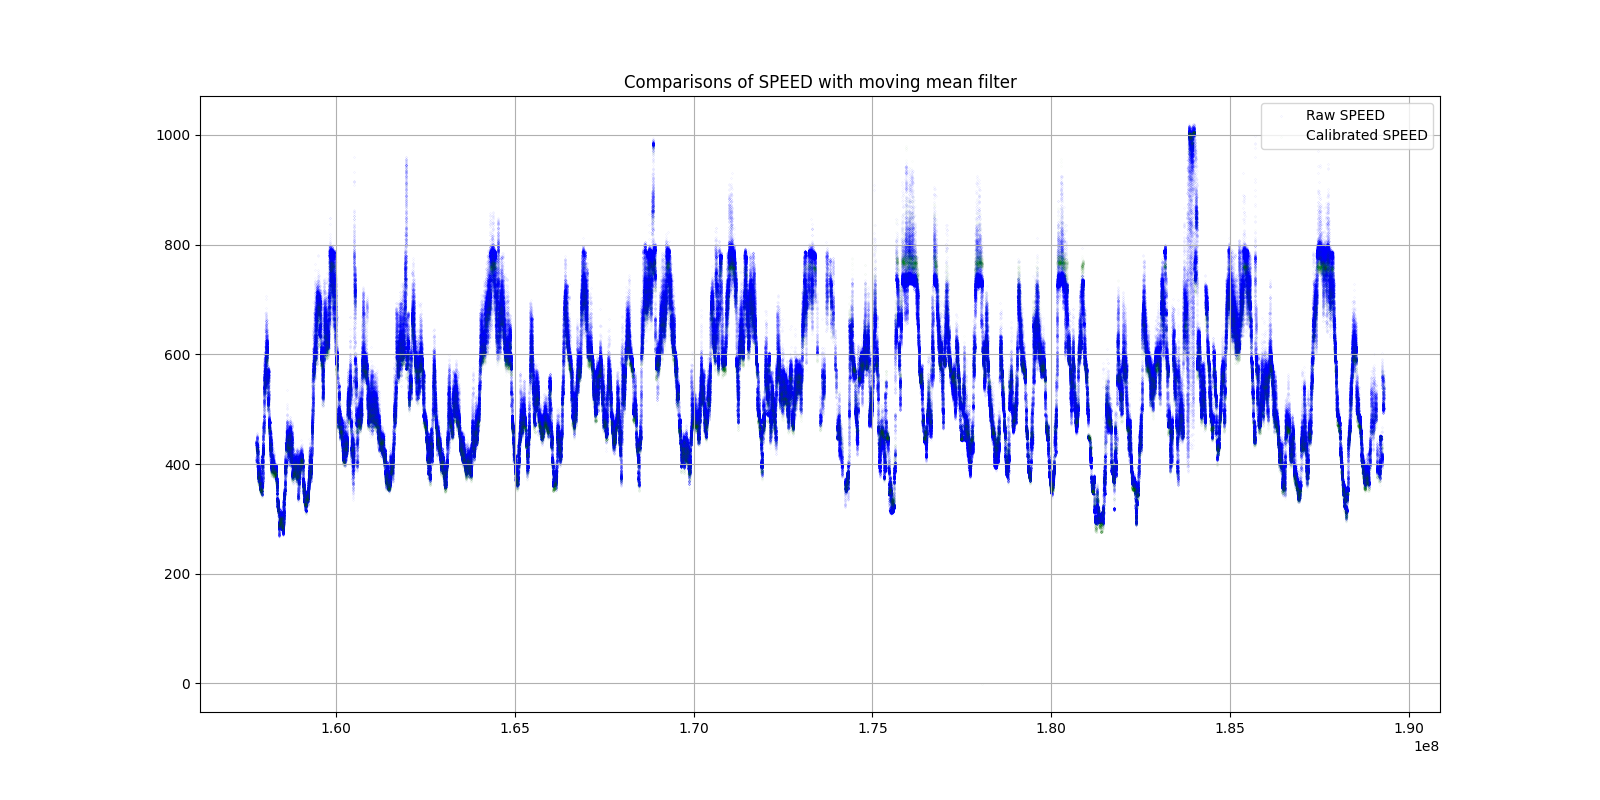

In [50]:
moving_filter(2003,"SPEED", 10)

In [16]:
df = pd.read_parquet(f"Data\Raw_converter\{2003}.parquet")
display(df)

,YY,MON,DY,DOY:HH:MM:SS,Seconds,SPEED,Np,Vth,N/S,V_He,GSE_X,GSE_Y,GSE_Z,RANGE,HGLAT,HGLONG,CRN(E)
0,3,Jan,1,001:00:00:15,157766415.0,407,5.38,33,-1.6,418,194.3,-31.8,15.7,145.9,-3.0,302.2,1998
1,3,Jan,1,001:00:00:45,157766445.0,404,5.57,32,-2.2,414,194.3,-31.8,15.7,145.9,-3.0,302.2,1998
2,3,Jan,1,001:00:01:15,157766475.0,408,5.79,33,-2.0,419,194.3,-31.8,15.7,145.9,-3.0,302.2,1998
3,3,Jan,1,001:00:01:45,157766505.0,405,5.84,32,-2.4,415,194.3,-31.8,15.7,145.9,-3.0,302.2,1998
4,3,Jan,1,001:00:02:15,157766535.0,408,5.43,33,-1.7,419,194.3,-31.8,15.7,145.9,-3.0,302.2,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003095,3,Dec,31,365:23:57:13,189302233.0,526,7.80,43,-3.8,546,192.8,4.9,16.7,145.9,-2.9,164.7,2011
1003096,3,Dec,31,365:23:57:43,189302263.0,522,7.34,44,-3.2,542,192.8,4.9,16.7,145.9,-2.9,164.7,2011
1003097,3,Dec,31,365:23:58:13,189302293.0,533,8.33,43,-4.0,552,192.8,4.9,16.7,145.9,-2.9,164.7,2011
1003098,3,Dec,31,365:23:58:42,189302322.0,518,8.21,45,-3.0,541,192.8,4.9,16.7,145.9,-2.9,164.7,2011


In [23]:
n = len(df["Seconds"])
n

1003100

In [27]:
t = df["Seconds"][len(df["Seconds"])-1] - df["Seconds"][0]
t

31535937.0

In [30]:
tT = np.max(df["Seconds"]) - np.min(df["Seconds"])
tT

31535937.0

In [22]:
d = (1.61 - 1.59)*1e8
d

2000000.0000000019

In [32]:
d/t

0.0634197106621567

In [37]:
1/16

0.0625

In [34]:
fraq = sp.Rational(d/t)
display(fraq)

4569871764896537/72057594037927936